In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
S6JI = pd.read_csv('./magazine/final/S6JI_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [4]:
S6JI['ADFN_2'] = S6JI['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [5]:
S6JI['ADFN_2']

0      [빨갛, 더블, 코트, 타이츠, 라텍스, 소재, 보디, 슈트, 하이, 부츠, LAU...
1      [블랙, 보디, YSL, 골드, 잠금장치, 스몰, 사이즈, 솔, 페리, LAUREN...
2      [셔츠, LAURENT, ANTHONY, LAURENT, ANTHONY, 슈트, 업...
3      [쉬, 다이어트, 평생, 장거리, 수영, 선수, 몸, 가지, 불어나, 몸, 오래전,...
4      [마스크, 품귀, 현상, 마스크, 구입, 우리나라, 마스크, 대란, 현재, 안정적,...
                             ...                        
366    [지수, 볼수록, 좋아짐, 성격, 예쁘다, 노래, 노력, 실력, 시킴, 기획사, 마...
367    [지수, 웃긴, 캐릭터, 이상한, 캐릭터, 웃김, 하든, 궁, 시렁, 궁, 시렁, ...
368    [지수, 멘트, 재밌어서, 보고있는, 행복함, 지수, 폭발, ☆, 나와, 줬으면, ...
369    [저녁, 도레미, 마켓, 지수, 소통, 하려구, v, 앱, 켜, 줬으면, 기념, 스...
370    [감도, 쩌, 참도, 글코, 드라마, 주인공, 지수, 패널, 지수, 얼굴, 입덕, ...
Name: ADFN_2, Length: 371, dtype: object

### top50 리스트 생성

In [6]:
top500 = pd.read_csv('./S6JI_top500.csv', sep='|', encoding = 'utf-8')

In [7]:
top500

,word,count
0,지수,4236
1,예쁘다,1889
2,귀엽다,740
3,얼굴,523
4,사랑,456
...,...,...
495,KLEIN,16
496,네온,16
497,보통,16
498,결혼,16


In [8]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['지수', '예쁘다', '귀엽다', '얼굴', '사랑', 'LAURENT', '노래', '매력', 'DIOR', '음악', '목소리', '스타일', '패션', '춤', '아이돌', '실력', '최고', '브랜드', '라이브', '성격', '음색', '사랑스럽다', '컬렉션', '배우', '모델', '드레스', '메이크업', '여신', '여자', '외모']


In [9]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['지수', '예쁘다', '귀엽다', '얼굴', '사랑', 'LAURENT', '노래', '매력', 'DIOR', '음악', '목소리', '스타일', '패션', '춤', '아이돌', '실력', '최고', '브랜드', '라이브', '성격', '음색', '사랑스럽다', '컬렉션', '배우', '모델', '드레스', '메이크업', '여신', '여자', '외모', '블랙', '디자인', '쇼', '분위기', '여성', '하우스', '비주얼', '디자이너', '세계', '팬츠', '무대', '아름다운', '재킷', 'ANTHONY', '핑크', '솔로', '장식', '완성', '레전드', '이미지']


### top100

In [10]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['지수', '예쁘다', '귀엽다', '얼굴', '사랑', 'LAURENT', '노래', '매력', 'DIOR', '음악', '목소리', '스타일', '패션', '춤', '아이돌', '실력', '최고', '브랜드', '라이브', '성격', '음색', '사랑스럽다', '컬렉션', '배우', '모델', '드레스', '메이크업', '여신', '여자', '외모', '블랙', '디자인', '쇼', '분위기', '여성', '하우스', '비주얼', '디자이너', '세계', '팬츠', '무대', '아름다운', '재킷', 'ANTHONY', '핑크', '솔로', '장식', '완성', '레전드', '이미지', '셔츠', '걸그룹', '레드', '스타', '뷰티', '데님', '라인', '톱', '팬', '친구', '노력', '가수', '매치', '드라마', '파리', '입덕', '자연', '인기', '느낌', '카디건', '보컬', '아이템', '빛', '화보', '부츠', 'HEDI', '시크', '반전', '웃음', 'BLINK', '찰떡', '연예인', '천재', '티셔츠', '시즌', '인형', '도전', '립', '옷', '소녀', '마음', '디렉터', '화이트', '스커트', '입술', '연기', '소재', '아티스트', '천사', '로고']


In [11]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['지수', '예쁘다', '귀엽다', '얼굴', '사랑', 'LAURENT', '노래', '매력', 'DIOR', '음악', '목소리', '스타일', '패션', '춤', '아이돌', '실력', '최고', '브랜드', '라이브', '성격', '음색', '사랑스럽다', '컬렉션', '배우', '모델', '드레스', '메이크업', '여신', '여자', '외모', '블랙', '디자인', '쇼', '분위기', '여성', '하우스', '비주얼', '디자이너', '세계', '팬츠', '무대', '아름다운', '재킷', 'ANTHONY', '핑크', '솔로', '장식', '완성', '레전드', '이미지', '셔츠', '걸그룹', '레드', '스타', '뷰티', '데님', '라인', '톱', '팬', '친구', '노력', '가수', '매치', '드라마', '파리', '입덕', '자연', '인기', '느낌', '카디건', '보컬', '아이템', '빛', '화보', '부츠', 'HEDI', '시크', '반전', '웃음', 'BLINK', '찰떡', '연예인', '천재', '티셔츠', '시즌', '인형', '도전', '립', '옷', '소녀', '마음', '디렉터', '화이트', '스커트', '입술', '연기', '소재', '아티스트', '천사', '로고', '새로운', '여름', '멋있다', '고급', '영화', '이야기', '좋', '가을', '말투', '코디', '새', '완벽', '피부', 'COUTURE', '앨범', '미소', '클래식', '한국', '실물', '가죽', '작업', '주인공', '프로', '벨트', '몸', '몸매', '작품', '쿠션', '관심', '취향', '어깨', '활동', '게임', '슈트', '컬러', '벨벳', '액세서리', '인터뷰', '비즈', '볼살', '꽃', '엄마', '화장', '개성', '코트', '골드', '곳', 'CREATIVE', '숄더', '해외', '파', '미국', '담당', '볼', '나이', '힘', '점'

In [12]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['지수', '예쁘다', '귀엽다', '얼굴', '사랑', 'LAURENT', '노래', '매력', 'DIOR', '음악', '목소리', '스타일', '패션', '춤', '아이돌', '실력', '최고', '브랜드', '라이브', '성격', '음색', '사랑스럽다', '컬렉션', '배우', '모델', '드레스', '메이크업', '여신', '여자', '외모', '블랙', '디자인', '쇼', '분위기', '여성', '하우스', '비주얼', '디자이너', '세계', '팬츠', '무대', '아름다운', '재킷', 'ANTHONY', '핑크', '솔로', '장식', '완성', '레전드', '이미지', '셔츠', '걸그룹', '레드', '스타', '뷰티', '데님', '라인', '톱', '팬', '친구', '노력', '가수', '매치', '드라마', '파리', '입덕', '자연', '인기', '느낌', '카디건', '보컬', '아이템', '빛', '화보', '부츠', 'HEDI', '시크', '반전', '웃음', 'BLINK', '찰떡', '연예인', '천재', '티셔츠', '시즌', '인형', '도전', '립', '옷', '소녀', '마음', '디렉터', '화이트', '스커트', '입술', '연기', '소재', '아티스트', '천사', '로고', '새로운', '여름', '멋있다', '고급', '영화', '이야기', '좋', '가을', '말투', '코디', '새', '완벽', '피부', 'COUTURE', '앨범', '미소', '클래식', '한국', '실물', '가죽', '작업', '주인공', '프로', '벨트', '몸', '몸매', '작품', '쿠션', '관심', '취향', '어깨', '활동', '게임', '슈트', '컬러', '벨벳', '액세서리', '인터뷰', '비즈', '볼살', '꽃', '엄마', '화장', '개성', '코트', '골드', '곳', 'CREATIVE', '숄더', '해외', '파', '미국', '담당', '볼', '나이', '힘', '점'

In [13]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['지수', '예쁘다', '귀엽다', '얼굴', '사랑', 'LAURENT', '노래', '매력', 'DIOR', '음악', '목소리', '스타일', '패션', '춤', '아이돌', '실력', '최고', '브랜드', '라이브', '성격', '음색', '사랑스럽다', '컬렉션', '배우', '모델', '드레스', '메이크업', '여신', '여자', '외모', '블랙', '디자인', '쇼', '분위기', '여성', '하우스', '비주얼', '디자이너', '세계', '팬츠', '무대', '아름다운', '재킷', 'ANTHONY', '핑크', '솔로', '장식', '완성', '레전드', '이미지', '셔츠', '걸그룹', '레드', '스타', '뷰티', '데님', '라인', '톱', '팬', '친구', '노력', '가수', '매치', '드라마', '파리', '입덕', '자연', '인기', '느낌', '카디건', '보컬', '아이템', '빛', '화보', '부츠', 'HEDI', '시크', '반전', '웃음', 'BLINK', '찰떡', '연예인', '천재', '티셔츠', '시즌', '인형', '도전', '립', '옷', '소녀', '마음']


### top50만 남기기

In [14]:
len(S6JI)

371

In [15]:
top30_word = []
for i in range(len(S6JI)):
    w=[]
    for word in S6JI.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [16]:
top50_word = []
for i in range(len(S6JI)):
    w=[]
    for word in S6JI.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [17]:
top100_word = []
for i in range(len(S6JI)):
    w=[]
    for word in S6JI.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [18]:
top200_word = []
for i in range(len(S6JI)):
    w=[]
    for word in S6JI.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [19]:
top300_word = []
for i in range(len(S6JI)):
    w=[]
    for word in S6JI.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [20]:
top500_word = []
for i in range(len(S6JI)):
    w=[]
    for word in S6JI.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [21]:
S6JI

,magazine,brand,title,word,ADFN,ADFN_2
0,A,YSL,"깊게 뿌리내리기 위하여, 수영","['빨간 더블 브레스티드 코트, 타이츠, 라텍스 소재 보디슈트와 사이하이 부츠는 모...","['빨갛', '더블', '코트', '타이츠', '라텍스', '소재', '보디', '...","[빨갛, 더블, 코트, 타이츠, 라텍스, 소재, 보디, 슈트, 하이, 부츠, LAU..."
1,A,YSL,백 하나 살까 고민했다면? 영원한 아이코닉 백 6가지,[' 블랙 보디에 YSL 골드 잠금장치를 더한 스몰 사이즈 솔페리노 사첼백은 4백...,"['블랙', '보디', 'YSL', '골드', '잠금장치', '스몰', '사이즈',...","[블랙, 보디, YSL, 골드, 잠금장치, 스몰, 사이즈, 솔, 페리, LAUREN..."
2,A,YSL,골든의 황금시간,[' 셔츠는 생로랑 바이 안토니 바카렐로(Saint Laurent by Antho...,"['셔츠', 'LAURENT', 'ANTHONY', 'LAURENT', 'ANTHO...","[셔츠, LAURENT, ANTHONY, LAURENT, ANTHONY, 슈트, 업..."
3,A,YSL,다이어트의 마음,['나는 쉬지 않고 다이어트를 한다. 평생을 장거리 수영선수 같은 몸을 가지고 싶었...,"['쉬', '다이어트', '평생', '장거리', '수영', '선수', '몸', '가...","[쉬, 다이어트, 평생, 장거리, 수영, 선수, 몸, 가지, 불어나, 몸, 오래전,..."
4,A,YSL,네? 명품 브랜드의 마스크라고요? 코로나19가 바꾼 전 세계 패션 신,"['마스크 품귀현상, 마스크 구입 5부제 등 우리나라를 떠들썩하게 만들었던 마스크 ...","['마스크', '품귀', '현상', '마스크', '구입', '우리나라', '마스크'...","[마스크, 품귀, 현상, 마스크, 구입, 우리나라, 마스크, 대란, 현재, 안정적,..."
...,...,...,...,...,...,...
366,YOUTUBE,Ji,블랙핑크 지수 실력없다고 왜이래~ 나 블랙핑크야~ 제대로 보여줄게! [All Abo...,['지수 진짜 보면 볼수록 더 좋아짐 성격도 좋고 예쁘다 노래도 잘하고 노력도 많이...,"['지수', '진짜', '보면', '볼수록', '더', '좋아짐', '성격', '도...","[지수, 볼수록, 좋아짐, 성격, 예쁘다, 노래, 노력, 실력, 시킴, 기획사, 마..."
367,YOUTUBE,Ji,사랑스러움지수 한도초과! 🧡지수🖤 모음 3탄! [예능맛ZIP 맛남의 광장_Delic...,['지수 엄청 웃긴 캐릭터라기보다 이상한 캐릭터라서 웃김 ㅋㅋㅋㅋㅋㅋ 다른 BLAC...,"['지수', '엄청', '웃긴', '캐릭터', '라기', '보다', '이상한', '...","[지수, 웃긴, 캐릭터, 이상한, 캐릭터, 웃김, 하든, 궁, 시렁, 궁, 시렁, ..."
368,YOUTUBE,Ji,지수 MBTI는 'CUTE'가 분명해 🧡지수🖤 모음 5탄! [예능맛ZIP 맛남의 광...,"['지수는 멘트하나하나가 넘 재밌어서 보고있는더 행복함^^', '지수 예능 폭발 ☆...","['지수', '는', '멘트', '하', '나', '하나', '가', '넘', '재...","[지수, 멘트, 재밌어서, 보고있는, 행복함, 지수, 폭발, ☆, 나와, 줬으면, ..."
369,YOUTUBE,Ji,지수가 먹지 지수 먹방 영상😎 _ BLACKPINK JISOO_korean_comm...,['오늘 저녁 7시 40분 도레미 마켓에 지수와 로제가 출연합니다! 'BLACKPI...,"['오늘', '저녁', '7시', '40분', '도레미', '마켓', '에', '지...","[저녁, 도레미, 마켓, 지수, 소통, 하려구, v, 앱, 켜, 줬으면, 기념, 스..."


### item 남기기

In [22]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [23]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [24]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [25]:
# len(top100_not_item_word)

In [26]:
# top100_not_item_word[1]

In [27]:
top50_word

[['LAURENT', 'ANTHONY', 'LAURENT', 'ANTHONY'],
 ['블랙', 'LAURENT', 'ANTHONY', 'LAURENT', 'ANTHONY', 'LAURENT', '브랜드'],
 ['LAURENT', 'ANTHONY', 'LAURENT', 'ANTHONY', '스타일'],
 ['최고', '사랑', '스타일', 'ANTHONY', 'LAURENT', 'LAURENT', 'LAURENT'],
 ['브랜드', 'LAURENT', '세계'],
 ['쇼', 'LAURENT', 'ANTHONY', 'LAURENT', 'ANTHONY'],
 ['장식',
  '드레스',
  'LAURENT',
  'ANTHONY',
  'LAURENT',
  'ANTHONY',
  '드레스',
  'LAURENT',
  'ANTHONY'],
 ['브랜드',
  '브랜드',
  '브랜드',
  '컬렉션',
  '드레스',
  '장식',
  '브랜드',
  'LAURENT',
  '브랜드',
  '디자이너',
  '디자이너',
  '브랜드',
  'LAURENT',
  '디자인',
  '브랜드',
  '브랜드'],
 ['패션', 'LAURENT', '재킷', '패션', '재킷', '사랑'],
 ['브랜드', '블랙', '컬렉션', '디자인', '세계', '블랙', 'LAURENT', '브랜드'],
 ['LAURENT', 'ANTHONY', 'LAURENT', 'ANTHONY'],
 ['드레스', 'LAURENT', 'ANTHONY', 'LAURENT', 'ANTHONY'],
 ['재킷', '팬츠', 'LAURENT', '사랑', 'LAURENT', '무대'],
 ['LAURENT', '블랙', '스타일', 'LAURENT', '패션'],
 ['장식', 'LAURENT'],
 ['LAURENT', '스타일', '매력'],
 ['지수',
  '팬츠',
  '재킷',
  '팬츠',
  'LAURENT',
  'LAURENT',
  '재킷',
  '팬츠',
  '지수

In [28]:
len(top50_word)

371

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [29]:
# 어프라이어리(Apriori)
from apyori import apriori

In [30]:
top30_word[0]

['LAURENT', 'LAURENT']

In [48]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.1))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
64,"(사랑, 지수)",0.194070,"[((), (사랑, 지수), 0.1940700808625337, 1.0), ((사랑...",2
71,"(얼굴, 지수)",0.188679,"[((), (얼굴, 지수), 0.18867924528301888, 1.0), ((얼...",2
55,"(매력, 지수)",0.185984,"[((), (매력, 지수), 0.18598382749326145, 1.0), ((매...",2
41,"(DIOR, 지수)",0.172507,"[((), (DIOR, 지수), 0.1725067385444744, 1.0), ((...",2
46,"(패션, LAURENT)",0.148248,"[((), (패션, LAURENT), 0.14824797843665768, 1.0)...",2
67,"(스타일, 지수)",0.148248,"[((), (스타일, 지수), 0.14824797843665768, 1.0), ((...",2
50,"(귀엽다, 지수)",0.145553,"[((), (귀엽다, 지수), 0.14555256064690028, 1.0), ((...",2
45,"(컬렉션, LAURENT)",0.142857,"[((), (LAURENT, 컬렉션), 0.14285714285714285, 1.0...",2
72,"(예쁘다, 지수)",0.140162,"[((), (예쁘다, 지수), 0.14016172506738545, 1.0), ((...",2
73,"(음악, 지수)",0.134771,"[((), (음악, 지수), 0.1347708894878706, 1.0), ((음악...",2


In [49]:
for item in df['items']:
    if '리사' in item:
        print(item)

In [50]:
df[df['items'] == {'리사'}]

,items,support,ordered_statistics,length


### networkx 그래프 정의

In [51]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [52]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [53]:
pos = nx.spring_layout(G)

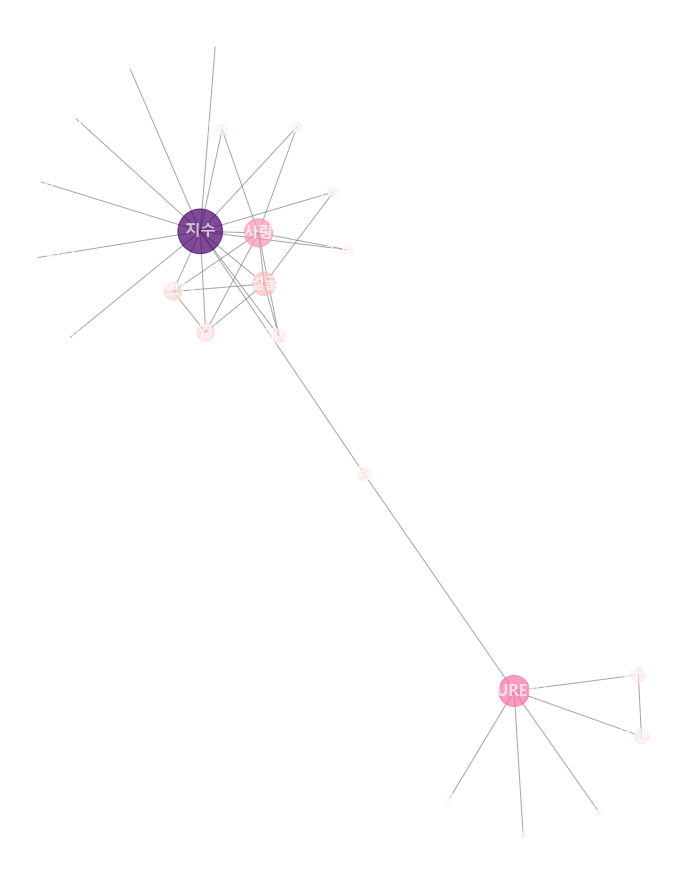

In [54]:
plt.figure(figsize = (12, 16)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.RdPu,
                font_color = 'white', font_weight = 'bold')

plt.savefig('./final_img/nt_S6JI_top500_mis1.png', bbox_inches = 'tight', transparent = True)
plt.show()


In [47]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']